In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#tf.__version__
data=pd.read_csv('Concrete_Data_Yeh.csv')
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
X=data['water']
y_true=data['cement']


In [8]:
def line(x,w=0,b=0):
    return w*x+b
def mean_squared_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())    #hamy is error ko kam se kam karna huta hai or accuracy
                                #ko barhana huta hai

Text(0.5, 0, 'b')

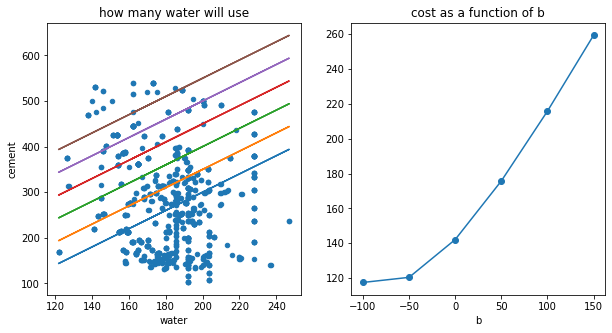

In [9]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)
data.plot(kind='scatter',
       x="water",
       y="cement",
       title='how many water will use',ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(X,w=2,b=b)
    mse=mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD


In [11]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [14]:
model.fit(X,y_true,epochs=40)

Train on 1030 samples
Epoch 1/40
1030/1030 [==============================] - 1s 839us/sample - loss: 15192.0167
Epoch 2/40
1030/1030 [==============================] - 0s 93us/sample - loss: 13219.1581
Epoch 3/40
1030/1030 [==============================] - 0s 70us/sample - loss: 13534.7563
Epoch 4/40
1030/1030 [==============================] - 0s 47us/sample - loss: 13527.1193
Epoch 5/40
1030/1030 [==============================] - 0s 47us/sample - loss: 13067.9665
Epoch 6/40
1030/1030 [==============================] - 0s 47us/sample - loss: 12610.3116
Epoch 7/40
1030/1030 [==============================] - 0s 43us/sample - loss: 12890.8290
Epoch 8/40
1030/1030 [==============================] - 0s 43us/sample - loss: 13863.9123
Epoch 9/40
1030/1030 [==============================] - 0s 50us/sample - loss: 13495.6056
Epoch 10/40
1030/1030 [==============================] - 0s 47us/sample - loss: 12603.8061
Epoch 11/40
1030/1030 [==============================] - 0s 50us/sample - lo

In [15]:
y_pred=model.predict(X)

In [16]:
y_pred

array([[252.60196],
       [252.60196],
       [311.50488],
       ...,
       [280.00073],
       [264.73953],
       [287.05124]], dtype=float32)

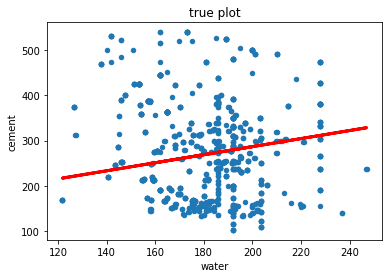

In [18]:
data.plot(kind='scatter',
         x='water',
         y="cement",
         title='true plot')
plt.plot(X,y_pred,color='red',linewidth=3)


In [19]:
w,b=model.get_weights()

In [20]:
w

array([[0.8924686]], dtype=float32)

In [21]:
b

array([108.02204], dtype=float32)

In [24]:
model.predict([[180]])

array([[268.66638]], dtype=float32)